# JPY/INR

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv(r'C:\Users\DELL\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [4]:
jpy_inr = df.loc[df['Currency Pair']=='JPY/INR']
jpy_inr.reset_index(drop=True,inplace=True)


In [5]:
import swing_technical_indicators 

In [6]:
print(dir(swing_technical_indicators))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_100ema', 'calculate_200ema', 'calculate_50ema', 'calculate_bollinger_bands', 'calculate_macd', 'calculate_rsi', 'calculate_swing_support_resistance', 'indicators']


1. ADFuller Test 

In [7]:
jpy_inr['Date']= pd.to_datetime(jpy_inr['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\2019296255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpy_inr['Date']= pd.to_datetime(jpy_inr['Date'])


In [8]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for i in jpy_inr.columns : 
  if i!='Currency Pair' :
    print("ADFuller test for column : ",i)
    check_stationarity(jpy_inr[i])

ADFuller test for column :  Date
ADF Statistic: 0.872360
p-value: 0.992719
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Open_price
ADF Statistic: -1.854371
p-value: 0.353821
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_high
ADF Statistic: -1.939119
p-value: 0.313888
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_low
ADF Statistic: -1.828493
p-value: 0.366410
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test fo

# Decomposition

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

def deseasonalize_column(data, column, period=7):
    """
    Deseasonalizes a column by decomposing it into trend, seasonality, and residual components.
    
    Parameters:
    - data (pd.DataFrame): The DataFrame containing the time series data.
    - column (str): The name of the column to deseasonalize.
    - period (int): The periodicity of the data (e.g., 7 for weekly seasonality).
    
    Returns:
    - pd.Series: The deseasonalized version of the column.
    """
    # Decompose the column
    decomposition = seasonal_decompose(data[column], model='additive', period=period, extrapolate_trend='freq')
    
    # Extract the residual component as deseasonalized data
    deseasonalized = data[column] - decomposition.seasonal
    
    return deseasonalized

# Identify non-stationary columns
non_stationary_columns = ['Day_high', 'Day_low', 'Open_price']

# Create deseasonalized columns
for col in non_stationary_columns:
    deseasonalized_col = deseasonalize_column(jpy_inr, col, period=14)  # Adjust the period as needed
    jpy_inr[f'Deseasonalized_{col}'] = deseasonalized_col


C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\1611286044.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpy_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\1611286044.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpy_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\1611286044.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [10]:
jpy_inr 

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601
...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954


## EMA 100 Feature 

In [11]:
jpy_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 100)
jpy_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\1505622001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpy_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 100)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589
...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598


## EMA 200 

In [12]:
jpy_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(jpy_inr, 'Closing_price', 200)
jpy_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\1960885368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpy_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(jpy_inr, 'Closing_price', 200)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727
...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076


## EMA 50 

In [13]:
jpy_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 50)
jpy_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\4069695575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpy_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(jpy_inr, 'Closing_price', 50)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329


## RSI Feature 

In [14]:
jpy_inr['RSI'] = swing_technical_indicators.calculate_rsi(jpy_inr,'Closing_price',21)
jpy_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\1394544658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpy_inr['RSI'] = swing_technical_indicators.calculate_rsi(jpy_inr,'Closing_price',21)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871


In [15]:
import plotly.express as px 
px.line(jpy_inr['RSI'])

## MACD

In [16]:
jpy_inr_macd = swing_technical_indicators.calculate_macd(jpy_inr, column_name='Closing_price', short_period=12, long_period=26, signal_period=9)

for i in jpy_inr_macd.columns:

    jpy_inr[f"{i}"] = jpy_inr_macd[f'{i}']

jpy_inr


C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_8476\2300810596.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000,0.000000,0.000000e+00,0.000000
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000,0.000005,9.572650e-07,0.000004
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000,-0.000396,-7.842673e-05,-0.000318
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000,-0.000708,-2.043055e-04,-0.000504
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000,-0.000901,-3.436465e-04,-0.000557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372,-0.006265,-5.093533e-03,-0.001171
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909,-0.006417,-5.358170e-03,-0.001059
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433,-0.006766,-5.639814e-03,-0.001127
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871,-0.006999,-5.911680e-03,-0.001087


## Bollinger Bands 

In [17]:
bollinger_data = swing_technical_indicators.calculate_bollinger_bands(jpy_inr['Closing_price'])

jpy_inr = jpy_inr.join(bollinger_data)
jpy_inr.drop('Price',axis=1, inplace=True)

c:\Users\DELL\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:202: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\DELL\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:203: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [18]:

X1 = jpy_inr.drop(['Date','Open_price','Day_high','Day_low','Closing_price','Currency Pair'],axis=1)
y =jpy_inr['Closing_price']

## Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X1)
X= pd.DataFrame(X,columns = X1.columns)

In [20]:
# Calculate MAE, MSE, RMSE, and MAPE for the train and test sets
from sklearn.metrics import *

def evaluate_model(actual, predicted):
    # Calculate MAE
    mae = mean_absolute_error(actual, predicted)
    
    # Calculate MSE
    mse = mean_squared_error(actual, predicted)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = mean_absolute_percentage_error(actual, predicted) * 100  # Convert to percentage
    
    # Calculate R² Score
    r2 = r2_score(actual, predicted)
    
    # Calculate Accuracy (as 100% - MAPE)
    accuracy = 100 - mape  # Interpreted as an accuracy-like score
    
    return mae, mse, mape, r2, accuracy

## Supervised ML Models 

In [21]:
#Step 2: Define the model functions
# Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
def random_forest_model(X,y):
    rf = RandomForestRegressor()
    rf_metrics = {}

        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
        # Fit the model
    rf.fit(X_train, y_train)
        
        # Predict and calculate MAE
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"Mean Squared Error (MSE): {mse * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    rf_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    return rf_metrics
    

rf_metrics=random_forest_model(X,y)

print("\nRandom Forest Metrics :", rf_metrics)



Mean Absolute Error : 0.001398470934699128
Mean Absolute Percentage Error (MAPE): 0.22913340291849685%
Mean Squared Error (MSE): 0.00034656630921639915%
R-squared (R^2): 0.9987823207467527 

Random Forest Metrics : {'MAE': 0.001398470934699128, 'MSE': 3.4656630921639916e-06, 'MAPE': 0.22913340291849685, 'R^2': 0.9987823207467527}


## SVM 

In [22]:
from sklearn.svm import SVR
# SVM Model
def svm_model(X,y):
    svm = SVR()
    svm_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        

    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Predict
    y_pred = svm.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"Mean Squared Error (MSE): {mse * 100}%")
    print(f"R-squared (R^2) : {r2}")
    
    svm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

    
    return svm_metrics
    


svm_metrics=svm_model(X,y)
print("\nSVM Metrics :", svm_metrics)

Mean Absolute Error : 0.043033779241408776
Mean Absolute Percentage Error (MAPE): 7.196385944351837%
Mean Squared Error (MSE): 0.2563379102782769%
R-squared (R^2) : 0.10139988560291158

SVM Metrics : {'MAE': 0.043033779241408776, 'MSE': 0.002563379102782769, 'MAPE': 7.196385944351837, 'R^2': 0.10139988560291158}


## Hyperparameter tuning for SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def svm_model_with_hyperparameter_tuning(X,y):
    
    
    # Initialize the SVM model
    svm = SVR()
    svm_metrics = {}
    
    # Define the hyperparameter grid to search over
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
        'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter in the loss function
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
    # Perform GridSearchCV to find the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters : {best_params}")
    
    # Get the best model
    best_svm = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_svm.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    svmh_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

# Return the metrics for all currency pairs
    return svmh_metrics

svmh_metrics=svm_model_with_hyperparameter_tuning(X,y)
print(svmh_metrics)

Best Hyperparameters : {'C': 0.1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
MAE : 0.04126965876464022
Mean Absolute Percentage Error (MAPE): 6.924627107182932%
Mean Squared Error (MSE): 23.600258898385817%
R^2 : 0.1740524248920572


{'MAE': 0.04126965876464022,
 'MSE': 0.23600258898385817,
 'MAPE': 0.06924627107182932,
 'R^2': 0.1740524248920572}

## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def gradient_boosting_model(X,y):
    
    gb = GradientBoostingRegressor()
    gb_metrics = {}

    
    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
        
        
        # Train the model
    gb.fit(X_train, y_train)
    
    # Predict
    y_pred = gb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    gb_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

    return gb_metrics


gb_metrics=gradient_boosting_model(X,y)
print("\nGradient Boosting Metrics ", gb_metrics)

Mean Absolute Error : 0.0016304938717649038
Mean Squared Error : 5.1027599941870656e-06
Mean Absolute Percentage Error : 0.26763138134347814%
R-squared (R^2): 0.9981990149087613 

Gradient Boosting Metrics  {'MAE': 0.0016304938717649038, 'MSE': 5.1027599941870656e-06, 'MAPE': 0.26763138134347814, 'R^2': 0.9981990149087613}


## KNN 

In [24]:
from sklearn.neighbors import KNeighborsRegressor


def knn_model(X,y):
    knn = KNeighborsRegressor()
    knn_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    knn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}

    return knn_metrics


knn_metrics=knn_model(X,y)
print("\nKNN Metrics for each currency pair:", knn_metrics)

Mean Absolute Error : 0.002304348271446863
Mean Squared Error : 9.977983467349543e-06
Mean Absolute Percentage Error : 0.3742469524832562%
R-squared (R^2): 0.996628290162514 

KNN Metrics for each currency pair: {'MAE': 0.002304348271446863, 'MSE': 9.977983467349543e-06, 'MAPE': 0.3742469524832562, 'R^2': 0.996628290162514}


## XGBoost

In [25]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def xgboost_model(X,y):
    # Split the data by currency pair
    xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
    xgb_metrics = {}

    
        
    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
        
    # Train the model
    xgb.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    xgb_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    return xgb_metrics
    



xgb_metrics=xgboost_model(X,y)
print("\nXGBoost Metrics :", xgb_metrics)



Mean Absolute Error : 0.0015172582967027974
Mean Squared Error : 4.041723741661769e-06
Mean Absolute Percentage Error : 0.2486858253084256%
R-squared (R^2): 0.9985498135265829 

XGBoost Metrics : {'MAE': 0.0015172582967027974, 'MSE': 4.041723741661769e-06, 'MAPE': 0.2486858253084256, 'R^2': 0.9985498135265829}


## LightGBM

In [27]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [26]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def lightgbm_model(X,y):
    """
    Train and evaluate a LightGBM model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics.
    """
    # Initialize the LightGBM Regressor
    lgbm = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=-1)

    

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_train_pred=lgbm.predict(X_train)
    y_pred = lgbm.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse =  mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)

    

    # Print the metrics

    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    lgbm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    return lgbm_metrics

# Example usage
lgbm_metrics=lightgbm_model(X,y)
print("\nlgBoost Metrics :", lgbm_metrics)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 2081, number of used features: 13
[LightGBM] [Info] Start training from score 0.610760
Mean Absolute Error : 0.0014480209327048486
Mean Squared Error : 3.6931373278494057e-06
Mean Absolute Percentage Error : 0.23936119709300122%
R-squared (R^2): 0.9986640540086458 

lgBoost Metrics : {'MAE': 0.0014480209327048486, 'MSE': 3.6931373278494057e-06, 'MAPE': 0.23936119709300122, 'R^2': 0.9986640540086458}


## CatBoost

In [29]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def catboost_model(X,y):
    """
    Train and evaluate a CatBoost model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics, training, and testing accuracy scores.
    """
    # Initialize the CatBoost Regressor
    catboost = CatBoostRegressor(
        l2_leaf_reg=15,
        iterations=1000, 
        learning_rate=0.1, 
        depth=10, 
        loss_function='MAE',  # Can be changed to 'RMSE', etc., as needed
        verbose=0  # Set to 0 to suppress training logs
    )

    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    catboost.fit(X_train, y_train)

    # Make predictions
    y_train_pred = catboost.predict(X_train)  # Predictions on training data
    y_test_pred = catboost.predict(X_test)   # Predictions on testing data

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")
    
    cb_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
    return cb_metrics

# Example usage
cb_metrics=catboost_model(X,y)
print("\ncbBoost Metrics :", cb_metrics)

Mean Absolute Error : 0.0019593119908722025
Mean Squared Error : 7.090454260552357e-06
Mean Absolute Percentage Error : 0.32347097723401225%
R-squared (R^2): 0.997474659938708 

cbBoost Metrics : {'MAE': 0.0019593119908722025, 'MSE': 7.090454260552357e-06, 'MAPE': 0.32347097723401225, 'R^2': 0.997474659938708}


## Linear Regression 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R^2): {r2} ")
    
lr_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nlr Metrics :", lr_metrics)




Mean Absolute Error : 0.0009855810769460035
Mean Squared Error : 2.2956637759135973e-06
Mean Absolute Percentage Error : 0.1616750603935942%
R-squared (R^2): 0.9992109160448949 

lr Metrics : {'MAE': 0.0009855810769460035, 'MSE': 2.2956637759135973e-06, 'MAPE': 0.1616750603935942, 'R^2': 0.9992109160448949}


## MLPRegressor

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' where the last column is the target variable 'y'
# and all other columns are the features 'X'

# Example DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor (Neural Network model)

mlp_model = MLPRegressor(hidden_layer_sizes=(150,), max_iter=2000, random_state=42,activation= 'relu')

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = mlp_model.predict(X_test)

## Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R^2): {r2} ")
    
mlp_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nmlp Metrics :", mlp_metrics)


Mean Absolute Error : 0.010720191427592386
Mean Squared Error : 0.00019770277304514755
Mean Absolute Percentage Error : 1.7556870856964704%
R-squared (R^2): 0.9320440180628655 

mlp Metrics : {'MAE': 0.010720191427592386, 'MSE': 0.00019770277304514755, 'MAPE': 1.7556870856964704, 'R^2': 0.9320440180628655}


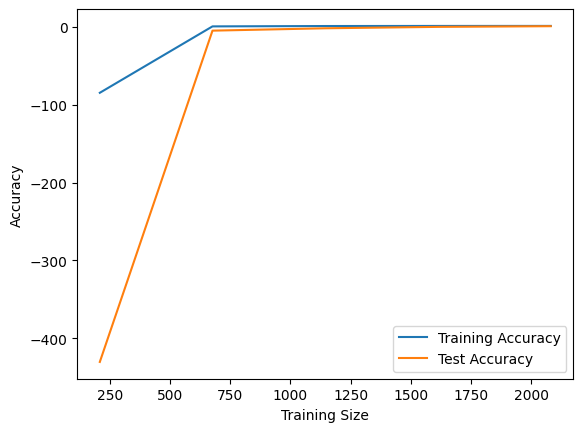

In [30]:
# Example of plotting learning curves using cross-validation
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Deep Learning Models**


## RNN

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0163 - mae: 0.0915 - val_loss: 0.0025 - val_mae: 0.0397
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - mae: 0.0396 - val_loss: 0.0067 - val_mae: 0.0697
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0344 - val_loss: 0.0035 - val_mae: 0.0481
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mae: 0.0302 - val_loss: 0.0076 - val_mae: 0.0757
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0287 - val_loss: 0.0059 - val_mae: 0.0658
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0268 - val_loss: 0.0101 - val_mae: 0.0867
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0259 - val_loss: 0.0086 - val_mae: 0.0798
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0250 - val_loss: 0.0105 - val_mae: 0.0888
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0251 - v

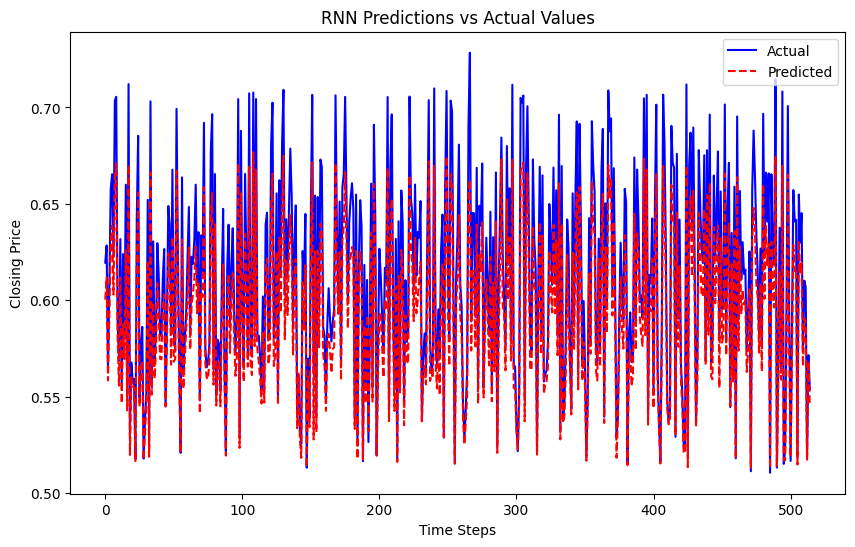

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X= X.select_dtypes('number').values
# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

rnn_metrics = {}
rnn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nRNN metrics :", rnn_metrics)

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("RNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


In [35]:
pip install tensorflow

## LSTM

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0496 - mae: 0.1448 - val_loss: 0.0017 - val_mae: 0.0309
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058 - mae: 0.0574 - val_loss: 0.0014 - val_mae: 0.0283
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0043 - mae: 0.0502 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0031 - mae: 0.0428 - val_loss: 0.0061 - val_mae: 0.0635
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030 - mae: 0.0405 - val_loss: 0.0021 - val_mae: 0.0352
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023 - mae: 0.0357 - val_loss: 0.0054 - val_mae: 0.0597
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019 - mae: 0.0332 - val_loss: 0.0068 - val_mae: 0.0695
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - mae: 0.0329 - val_loss: 0.0062 - val_mae: 0.0669
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - mae: 0.

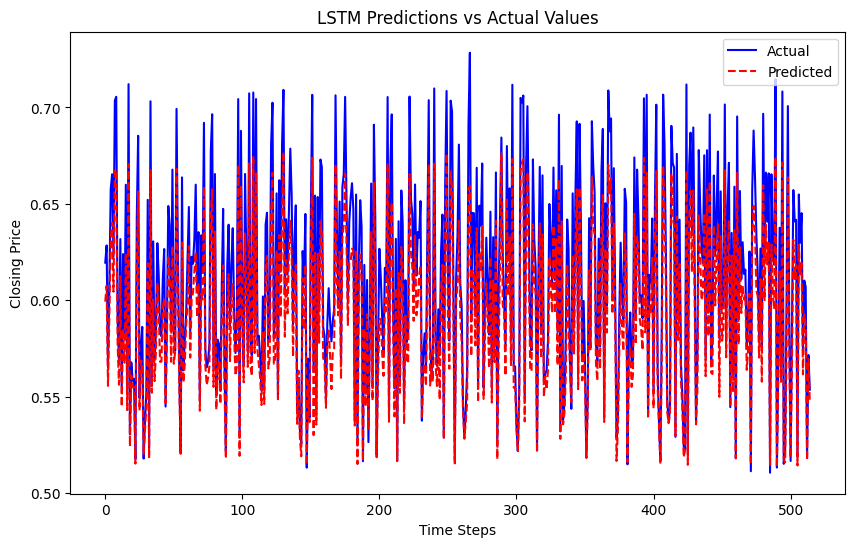

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mmae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

lstm_metrics = {}
lstm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nlstm metrics :", lstm_metrics)

# Plot predictions vs actual values
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## GRU

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0825 - mae: 0.1927 - val_loss: 0.0022 - val_mae: 0.0373
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0056 - mae: 0.0576 - val_loss: 0.0032 - val_mae: 0.0453
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040 - mae: 0.0481 - val_loss: 0.0025 - val_mae: 0.0400
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0032 - mae: 0.0429 - val_loss: 0.0037 - val_mae: 0.0489
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mae: 0.0393 - val_loss: 0.0037 - val_mae: 0.0512
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 0.0039 - val_mae: 0.0520
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 0.0049 - val_mae: 0.0591
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - mae: 0.0304 - val_loss: 0.0044 - val_mae: 0.0558
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - mae: 0.

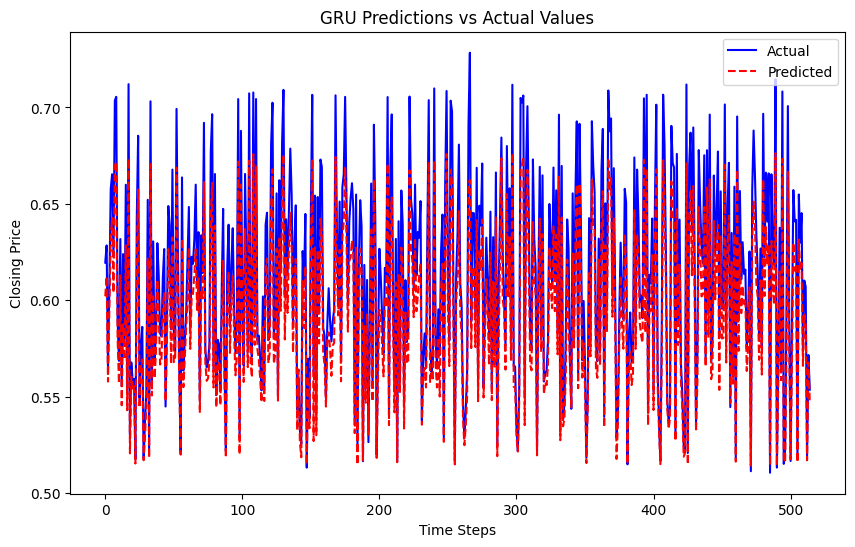

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = gru_model.evaluate(X_train, y_train)
test_loss, test_mae = gru_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_gru_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_gru_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_gru_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

gru_metrics = {}
gru_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\ngru metrics :", gru_metrics)

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_gru_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("GRU Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## CNN

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1426 - mae: 0.2321 - val_loss: 0.0040 - val_mae: 0.0499
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mae: 0.0609 - val_loss: 0.0025 - val_mae: 0.0371
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - mae: 0.0489 - val_loss: 0.0022 - val_mae: 0.0345
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - mae: 0.0454 - val_loss: 0.0019 - val_mae: 0.0326
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mae: 0.0430 - val_loss: 0.0018 - val_mae: 0.0315
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0026 - val_mae: 0.0387
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - mae: 0.0414 - val_loss: 0.0016 - val_mae: 0.0300
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - mae: 0.0400 - val_loss: 0.0016 - val_mae: 0.0298
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - mae: 0.0371 - v

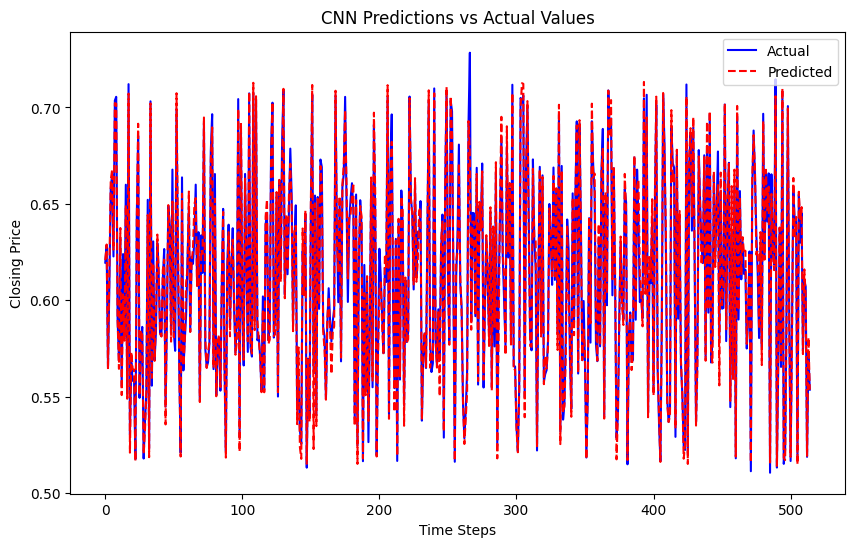

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_cnn_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_cnn_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")


cnn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\ncnn metrics :", cnn_metrics)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## CNN_LSTM

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0371 - mae: 0.1290 - val_loss: 0.0029 - val_mae: 0.0417
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mae: 0.0390 - val_loss: 0.0032 - val_mae: 0.0444
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - mae: 0.0331 - val_loss: 0.0042 - val_mae: 0.0526
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - mae: 0.0312 - val_loss: 0.0044 - val_mae: 0.0537
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - mae: 0.0310 - val_loss: 0.0082 - val_mae: 0.0760
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 0.0038 - val_mae: 0.0498
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - mae: 0.0318 - val_loss: 0.0046 - val_mae: 0.0547
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mae: 0.0288 - val_loss: 0.0067 - val_mae: 0.0695
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012

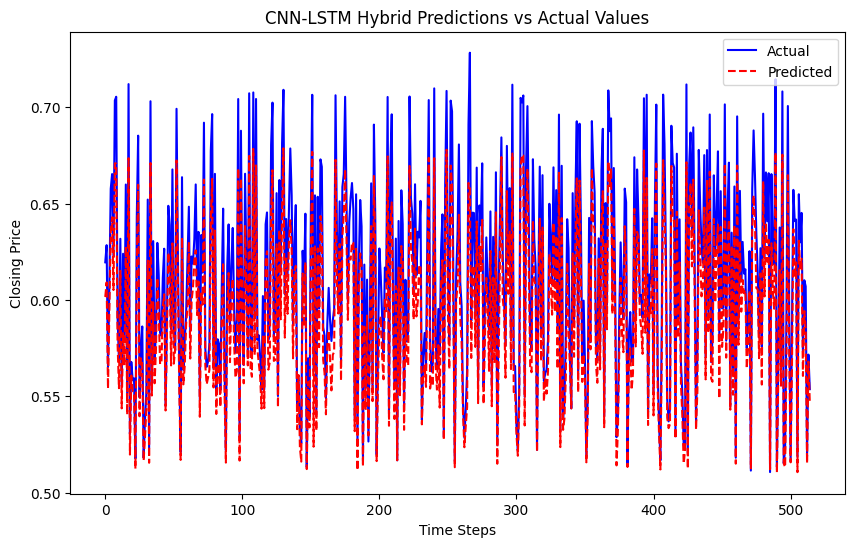

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in jpy_inr.columns if col not in ['Date', target]]

# Separate X and y
X = jpy_inr[features]
y = jpy_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN-LSTM hybrid model
cnn_lstm_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    LSTM(64, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_lstm_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_lstm_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_rescaled = scaler_y.inverse_transform(y_pred_cnn_lstm.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_lstm_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_cnn_lstm_rescaled)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R²: {r2:.4f}")

cnn_lstm_metrics = {'MAE': mae, 'MSE': mse,'MAPE': mape * 100, 'R^2': r2}
print("\ncnn-lstm metrics :", cnn_lstm_metrics)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_lstm_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN-LSTM Hybrid Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## SARIMA

In [40]:
jpy_inr

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,2014-11-07,0.53595,0.53913,0.53381,0.53587,JPY/INR,0.539529,0.534135,0.536495,0.535870,0.535870,0.535870,0.000000,0.000000,0.000000e+00,0.000000,0.525811,0.537685,0.513938
1,2014-11-10,0.53616,0.53963,0.53489,0.53593,JPY/INR,0.539838,0.535160,0.536451,0.535871,0.535871,0.535872,0.000000,0.000005,9.572650e-07,0.000004,0.525811,0.537685,0.513938
2,2014-11-11,0.53137,0.53415,0.53018,0.53086,JPY/INR,0.534150,0.530351,0.531638,0.535772,0.535821,0.535676,0.000000,-0.000396,-7.842673e-05,-0.000318,0.525811,0.537685,0.513938
3,2014-11-12,0.53080,0.53446,0.53045,0.53083,JPY/INR,0.534113,0.530330,0.530508,0.535674,0.535771,0.535486,0.000000,-0.000708,-2.043055e-04,-0.000504,0.525811,0.537685,0.513938
4,2014-11-13,0.53094,0.53298,0.53065,0.53137,JPY/INR,0.532193,0.530159,0.530601,0.535589,0.535727,0.535324,0.000000,-0.000901,-3.436465e-04,-0.000557,0.525811,0.537685,0.513938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2024-10-24,0.55027,0.55416,0.54994,0.55373,JPY/INR,0.553880,0.549600,0.549604,0.562361,0.559374,0.567381,33.994372,-0.006265,-5.093533e-03,-0.001171,0.565557,0.585700,0.545415
2598,2024-10-25,0.55375,0.55456,0.55198,0.55198,JPY/INR,0.554845,0.551944,0.553659,0.562155,0.559301,0.566777,33.482909,-0.006417,-5.358170e-03,-0.001059,0.563746,0.581709,0.545783
2599,2024-10-28,0.54847,0.55097,0.54627,0.54817,JPY/INR,0.550958,0.546250,0.548706,0.561878,0.559190,0.566047,20.722433,-0.006766,-5.639814e-03,-0.001127,0.562004,0.578819,0.545188
2600,2024-10-29,0.54900,0.55011,0.54604,0.54772,JPY/INR,0.550409,0.546071,0.548954,0.561598,0.559076,0.565329,22.265871,-0.006999,-5.911680e-03,-0.001087,0.560164,0.574476,0.545852


In [36]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assume jpy_inr is your DataFrame with the 'Date' column and target 'Closing_price'
# Ensure 'Date' is in datetime format
jpy_inr['Date'] = pd.to_datetime(jpy_inr['Date'])

# Convert 'Date' to numeric (timestamp)
jpy_inr['Date_numeric'] = jpy_inr['Date'].apply(lambda x: x.timestamp())

# Set the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(jpy_inr) * 0.8)
train, test = jpy_inr[:train_size], jpy_inr[train_size:]

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(3,1,2),  # AR, I, MA order
                       seasonal_order=(1, 1, 1, 6),  # Seasonal order
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
mape = mean_absolute_percentage_error(test[target], predictions)
r2 = r2_score(test[target], predictions)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R²): {r2:.2f}")
sarima_metrics = {'MAE': mae, 'MSE': mse,'MAPE': mape * 100, 'R^2': r2}
print("\nsarima metrics :", sarima_metrics)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ValueError: Input contains NaN.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mean Absolute Error (MAE): 1031403613631953032496283648.00
Mean Squared Error (MSE): 38397214887790588067887019287005950507259002910467424256.00
Mean Absolute Percentage Error : 1.856003408302225e+29%
R-squared (R²): -45363747456147255855174090400234756851717573503880374779904.00

sariman metrics : {'MAE': 1.031403613631953e+27, 'MSE': 3.839721488779059e+55, 'MAPE': 1.856003408302225e+29, 'R^2': -4.5363747456147256e+58}


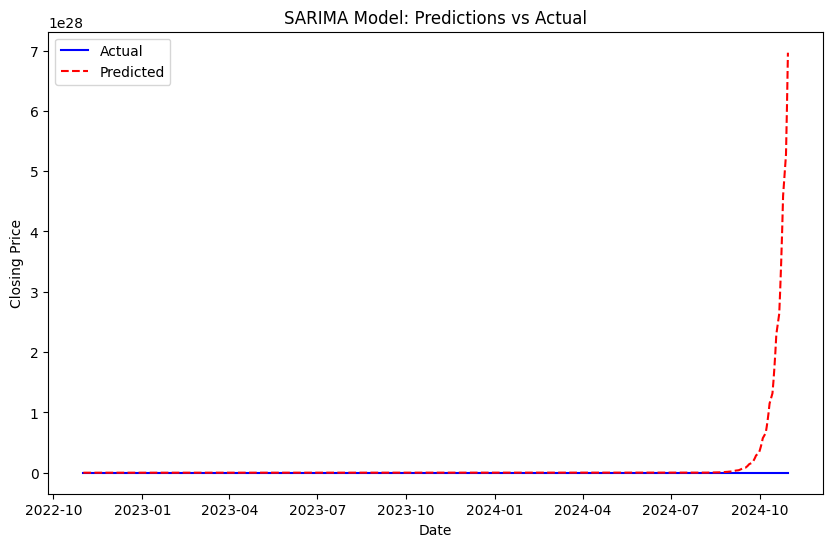

Root Mean Squared Error (RMSE): 6196548627081900489835544576.0000


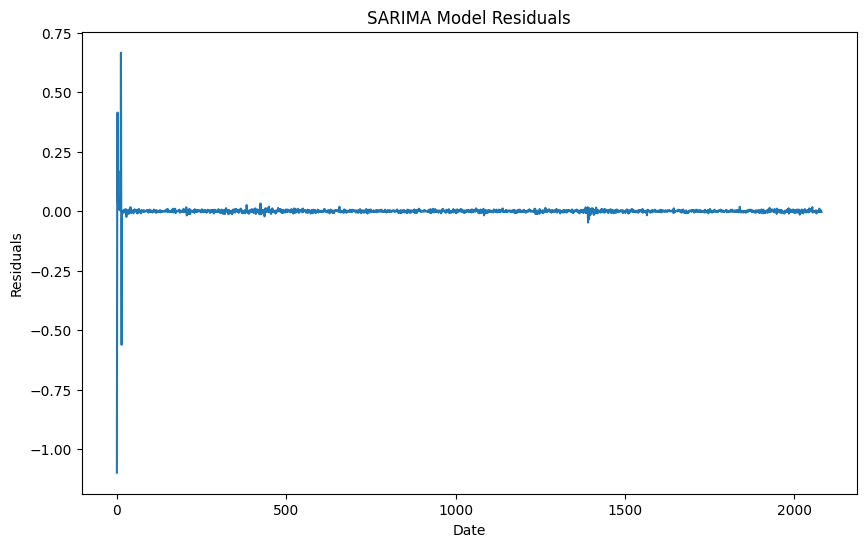

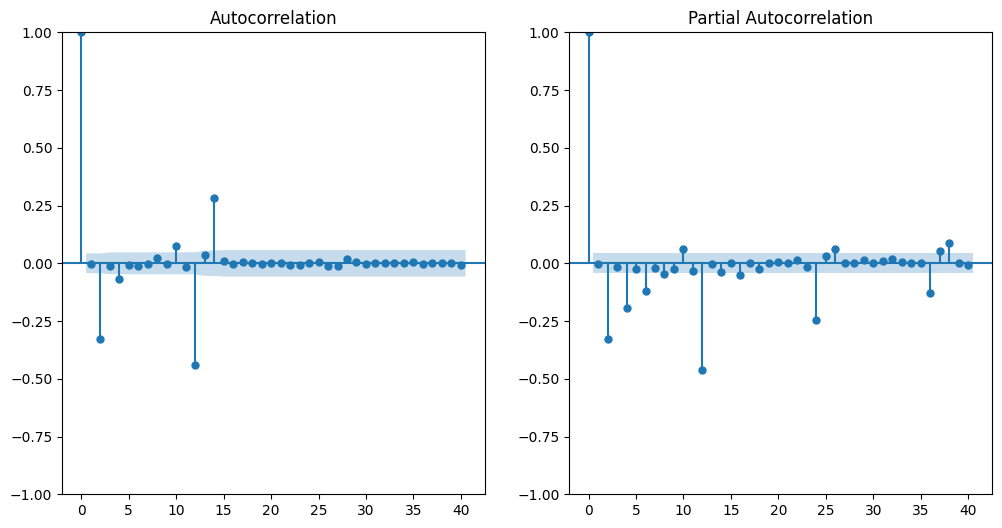

                                      SARIMAX Results                                       
Dep. Variable:                        Closing_price   No. Observations:                 2081
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                7894.453
Date:                              Sun, 01 Dec 2024   AIC                         -15770.906
Time:                                      17:59:42   BIC                         -15720.262
Sample:                                           0   HQIC                        -15752.335
                                             - 2081                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric  1.155e-09   2.06e-09      0.560      0.575   -2.88e-09     5.2e-09
ar.L1        

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Ensure 'Date' is in datetime format
jpy_inr['Date'] = pd.to_datetime(jpy_inr['Date'])

# Convert 'Date' to numeric (timestamp)
jpy_inr['Date_numeric'] = jpy_inr['Date'].apply(lambda x: x.timestamp())

# Define the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(jpy_inr) * 0.8)
train, test = jpy_inr[:train_size], jpy_inr[train_size:]

# Hyperparameters for SARIMA
p, d, q = 3, 1, 2  # AR, I, MA order
P, D, Q, S = 1, 1, 1, 12  # Seasonal AR, I, MA order, and period

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, S), 
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
mape = mean_absolute_percentage_error(test[target], predictions)
r2 = r2_score(test[target], predictions)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error : {mape * 100}%")
print(f"R-squared (R²): {r2:.2f}")
sariman_metrics = {'MAE': mae, 'MSE': mse,'MAPE': mape * 100, 'R^2': r2}
print("\nsariman metrics :", sariman_metrics)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Evaluate the model with RMSE
rmse_val = rmse(test[target], predictions)
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")

# Plot residuals to check for patterns
residuals = sarima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("SARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


## FBProphet

In [43]:
pip install prophet


In [1]:
# Calculate MAE, MSE, RMSE, and MAPE for the train and test sets
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    r2=r2_score(actual,predicted)
    
    return mae, mse, mape, r2 


In [39]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
df = jpy_inr  # Replace this with your data
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)
df.dropna(inplace=True)

# Add the 'cap' column for logistic growth (set it to the max of 'y')
df['cap'] = df['y'].max()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Set up the hyperparameters grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1, 10, 20],
    'holidays_prior_scale': [10, 15, 20],
    'changepoint_range': [0.8, 0.9],
    'growth': ['linear', 'logistic']  # Will test both linear and logistic growth
}

# Initialize variables to store the best model and best score
best_model = None
best_score = float('inf')
best_params = {}

# Grid Search Loop
for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
        for holidays_prior_scale in param_grid['holidays_prior_scale']:
            for changepoint_range in param_grid['changepoint_range']:
                for growth in param_grid['growth']:
                    # Initialize Prophet with the current set of hyperparameters
                    prophet_model = Prophet(
                        changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale,
                        holidays_prior_scale=holidays_prior_scale,
                        changepoint_range=changepoint_range,
                        growth=growth
                    )
                    
                    # If logistic growth, add the 'cap' column
                    if growth == 'logistic':
                        prophet_model.fit(train[['ds', 'y', 'cap','Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band']])
                    else:
                        prophet_model.fit(train[['ds', 'y','Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band']])
                    
                    # Create future dataframe for predictions
                    future = prophet_model.make_future_dataframe(periods=len(test))
                    
                    # Add the 'cap' column for logistic growth
                    if growth == 'logistic':
                        future['cap'] = df['cap'].iloc[0]  # Same constant value as for training
                    
                    forecast = prophet_model.predict(future)
                    
                    # Evaluate model performance on the test set
                    test_yhat = forecast['yhat'][-len(test):].values
                    #mae, mse, rmse, mape, accuracy = evaluate_model(test['y'].values, test_yhat)
                    
                    # If the model has better performance, store it
                    if mse < best_score:
                        best_score = mse
                        best_model = prophet_model
                        best_params = {
                            'changepoint_prior_scale': changepoint_prior_scale,
                            'seasonality_prior_scale': seasonality_prior_scale,
                            'holidays_prior_scale': holidays_prior_scale,
                            'changepoint_range': changepoint_range,
                            'growth': growth
                        }

# Output the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_score)

# Evaluate the best model on the test set
best_forecast = best_model.predict(best_model.make_future_dataframe(periods=len(test)))
test_yhat = best_forecast['yhat'][-len(test):].values


mae, mse, mape, r2 = evaluate_model(test['y'].values, test_yhat)




prophet_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nprophet metrics :", prophet_metrics)
#print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, Accuracy: {accuracy:.2f}%")


18:11:58 - cmdstanpy - INFO - Chain [1] start processing
18:11:58 - cmdstanpy - INFO - Chain [1] done processing
18:12:00 - cmdstanpy - INFO - Chain [1] start processing
18:12:00 - cmdstanpy - INFO - Chain [1] done processing
18:12:11 - cmdstanpy - INFO - Chain [1] start processing
18:12:11 - cmdstanpy - INFO - Chain [1] done processing
18:12:12 - cmdstanpy - INFO - Chain [1] start processing
18:12:12 - cmdstanpy - INFO - Chain [1] done processing
18:12:21 - cmdstanpy - INFO - Chain [1] start processing
18:12:21 - cmdstanpy - INFO - Chain [1] done processing
18:12:22 - cmdstanpy - INFO - Chain [1] start processing
18:12:24 - cmdstanpy - INFO - Chain [1] done processing
18:12:37 - cmdstanpy - INFO - Chain [1] start processing
18:12:37 - cmdstanpy - INFO - Chain [1] done processing
18:12:39 - cmdstanpy - INFO - Chain [1] start processing
18:12:39 - cmdstanpy - INFO - Chain [1] done processing
18:12:50 - cmdstanpy - INFO - Chain [1] start processing
18:12:51 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'changepoint_range': 0.8, 'growth': 'linear'}
Best MSE: 3.839721488779059e+55


ValueError: too many values to unpack (expected 4)

In [ ]:
best_model.params

OrderedDict([('lp__', array([[6568.32]])),
             ('k', array([[0.0823095]])),
             ('m', array([[0.71947]])),
             ('delta',
              array([[-1.24241e-08,  4.82441e-02,  9.51694e-01,  3.23119e-01,
                      -2.48940e-09, -6.28253e-01, -1.60812e+00,  6.75269e-09,
                       9.91717e-04,  5.94685e-01,  7.12052e-01,  1.11632e-01,
                       3.94992e-08, -9.91343e-07, -2.95335e-01, -1.50438e-07,
                       4.07248e-08,  1.01425e-01,  1.50533e-01,  1.47697e-04,
                      -4.09182e-08, -2.10521e-01, -1.32651e-01, -6.23360e-01,
                      -4.56862e-01]])),
             ('sigma_obs', array([[0.0184765]])),
             ('beta',
              array([[-4.70938e-03, -3.16229e-03,  3.78382e-03, -3.96000e-03,
                       1.39769e-03,  4.81698e-04, -2.41267e-05, -2.40413e-03,
                       9.98766e-04, -4.46574e-04, -1.29629e-03,  1.04636e-03,
                       1.89225e-03, -3

In [40]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
# Ensure your dataset has columns like 'Date', 'Closing_price', 'RSI', 'MACD', etc.
df = jpy_inr  # Replace `jpy_inr` with your actual dataframe variable
print("Columns in dataset:", df.columns)

# Rename columns as Prophet requires 'ds' (date) and 'y' (target)
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Specify the additional regressors
regressors = [
    'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
    'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
    'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band', 'Lower Band'
]

# Ensure all specified regressors are present in the dataset
missing_regressors = [r for r in regressors if r not in df.columns]
if missing_regressors:
    raise ValueError(f"Missing regressors in dataset: {missing_regressors}")

# Initialize the Prophet model with tuned hyperparameters
prophet_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    changepoint_range=best_params['changepoint_range'],
    growth=best_params['growth']
)

# Set the random state for reproducibility
prophet_model.random_state = 42

# Add each regressor to the Prophet model
for regressor in regressors:
    prophet_model.add_regressor(regressor)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]


# Train the model
#best_model.fit(train[['ds', 'y'] + regressors ])

# Create a future dataframe for predictions
future = best_model.make_future_dataframe(periods=len(test)+200)
for regressor in regressors:
    future[regressor] = df[regressor]



# Make predictions
forecast = best_model.predict(future)


# Evaluate on train and test sets
train_forecast = best_model.predict(train[['ds'] + regressors ])
train_yhat = train_forecast['yhat'].values
train_metrics = evaluate_model(train['y'].values, train_yhat)

test_forecast = best_model.predict(test[['ds'] + regressors ])
test_yhat = test_forecast['yhat'].values
test_metrics = evaluate_model(test['y'].values, test_yhat)

# Print metrics
print("Train Metrics:")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, MAPE: {train_metrics[3]:.2f}%, Accuracy: {train_metrics[4]:.2f}%")
print("\nTest Metrics:")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, MAPE: {test_metrics[3]:.2f}%, Accuracy: {test_metrics[4]:.2f}%")
mae, mse, mape, r2 = evaluate_model(test['y'].values, test_yhat)




prophetn_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nprophetn metrics :", prophetn_metrics)
# Plot predictions vs actual values
fig = go.Figure()

# Plot actual values
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Plot predicted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted', line=dict(color='red')))

# Plot upper and lower bounds
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound',
    line=dict(color='lightgrey', dash='dot')
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound',
    line=dict(color='lightgrey', dash='dot')
))

# Update layout
fig.update_layout(
    title="Prophet with Regressors: Predictions vs Actual",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()


Columns in dataset: Index(['ds', 'Open_price', 'Day_high', 'Day_low', 'y', 'Currency Pair',
       'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band', 'Date_numeric', 'cap'],
      dtype='object')
Train Metrics:
MAE: 0.0108, MSE: 0.0002, RMSE: 1.7434, MAPE: 0.94%, Accuracy: 98.26%

Test Metrics:
MAE: 0.0866, MSE: 0.0085, RMSE: 15.1450, MAPE: -9.02%, Accuracy: 84.85%


ValueError: too many values to unpack (expected 4)

# Bi-LSTM

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import *



# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False)),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
#y_pred_rescaled = y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
#y_test_rescaled = y.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae, mse, mape, r2 = evaluate_model(y_test, y_pred)




bilstm_metrics = {'MAE': mae, 'MSE': mse, 'MAPE': mape * 100, 'R^2': r2}
print("\nbilstm metrics :", bilstm_metrics)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("BiLSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0910 - mae: 0.1914 - val_loss: 0.0037 - val_mae: 0.0483
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0054 - mae: 0.0570 - val_loss: 0.0020 - val_mae: 0.0330
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mae: 0.0478 - val_loss: 0.0026 - val_mae: 0.0385
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0035 - mae: 0.0452 - val_loss: 0.0018 - val_mae: 0.0312
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mae: 0.0421 - val_loss: 0.0021 - val_mae: 0.0340
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mae: 0.0390 - val_loss: 0.0022 - val_mae: 0.0348
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0021 - mae: 0.0350 - val_loss: 0.0015 - val_mae: 0.0285
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025 - mae: 0.0373 - val_loss: 0.0031 - val_mae: 0.0421
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.001

ValueError: too many values to unpack (expected 4)

In [42]:
dlmetrics = {
    
    
    "RNN": rnn_metrics,
    "lstm": lstm_metrics,
    "GRU": gru_metrics,
    "CNN": cnn_metrics,
    "CNN-LSTM": cnn_lstm_metrics,
    "SARIMA": sarima_metrics,
    
    "FB Prophet": prophet_metrics,
    "hpt FB Prophet": prophetn_metrics,
    "BiLSTM": bilstm_metrics
    
    
}

# Convert the dictionary into a DataFrame
jpyinr_metrics_df = pd.DataFrame(dlmetrics).T
jpyinr_metrics_df


NameError: name 'sarima_metrics' is not defined

In [ ]:
jpyinr_metrics_df.to_csv("jpyinr_dlmetrics.csv")

In [ ]:
smlmetrics = {
    
    "Random Forest": rf_metrics,
    "SVM": svm_metrics,
    "Gradient Boosting": gb_metrics,
    "KNN": knn_metrics,
    "XGBoost": xgb_metrics,
    "Light BGM": lgbm_metrics,
    "RCatBoost": cb_metrics,
    "Linear regression": lr_metrics,
    "MLP": mlp_metrics,
}

# Convert the dictionary into a DataFrame
smlmetrics_df = pd.DataFrame.from_dict(smlmetrics, orient='index')

# Display the DataFrdlame
print(smlmetrics_df)

In [ ]:
smlmetrics_df.to_csv('jpyinr_smlmetrics.csv')